In [2]:
## Notebook to unified BFE coefficients computed with AGAMA, EXP, and  -> GAMEXP

In [103]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#import pyEXP
#import EXPtools
import gala
import bfe
#import agama

In [16]:
# Load Expansions 

def load_gc23_exp(mwlmc, n_init, n_final, host=False, sat=False,): 
    path_to_exp = "../../data/expansion/GC23_SCF/{}_1e7/".format(mwlmc)
    host_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_debris_test_host_snap_".format(mwlmc)
    sat_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_debris_test_sat_snap_".format(mwlmc)

    
    #host_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_host_snap_".format(mwlmc)
    #sat_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_sat_snap_".format(mwlmc)

    nsnaps = n_final - n_init
    
    coefficients = []
    exp_length = []
    exp_param = []
    com = []
    
    if host == True:
        host_coeff = np.zeros((nsnaps, 5, 21, 21, 21))
        host_rcom = np.zeros((nsnaps, 3))
        for i in range(n_init, n_final):
            print('snap {:03d}'.format(i))

            host_coeff[i-n_init], exp_host_length, exp_host_params, host_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + host_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(host_coeff)
        exp_length.append(exp_host_length)
        exp_param.append(exp_host_params)
        com.append(host_rcom)
        
    if sat == True:
        sat_coeff = np.zeros((nsnaps, 3, 21, 21, 21))
        sat_rcom = np.zeros((nsnaps, 3))
        
        for i in range(n_init, n_final):
            sat_coeff[i-n_init], exp_sat_length, exp_sat_params, sat_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + sat_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(sat_coeff)
        exp_length.append(exp_sat_length)
        exp_param.append(exp_sat_params)
        com.append(sat_rcom)
        
    
        
    return coefficients, exp_length, exp_param, com

In [17]:
mwlmc5_coeff, mwmlc5_exp_length, mwlmc5_exp_params, mwlmc5_rcom = load_gc23_exp('MWLMC5', 0, 399, True, False);

snap 000
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 001
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 002
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 003
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 004
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 005
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
snap 006
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rco

In [20]:
np.shape(mwlmc5_coeff)

(1, 399, 5, 21, 21, 21)

In [95]:
Sjnlm_host = mwlmc5_coeff[0][:,0]
Tjnlm_host = mwlmc5_coeff[0][:,1]

In [82]:
Sjnlm_host.shape

(5, 21, 21, 21)

In [100]:
power = np.sqrt(np.sum(np.sum(Sjnlm_host**2 + Tjnlm_host**2, axis=1), axis=2))

In [122]:
tgc23 = np.arange(0, 399*0.02, 0.02)

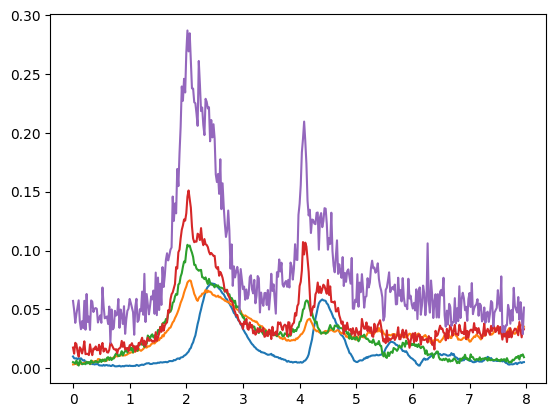

In [125]:
#plt.plot(power[:,0]/power[:,0])
plt.plot(tgc23, power[:,1]/power[0,0])
plt.plot(tgc23, power[:,2]/power[0,0])
plt.plot(tgc23, power[:,3]/power[0,0])
plt.plot(tgc23, power[:,4]/power[0,0])
plt.plot(tgc23, power[:,5]/power[0,0])